## Task 2: Transformer Encoder

In [1]:
import torch
from test import evaluate_test_set
import sts_data
import siamese_lstm_attention_with_transformer
#import sample_class
#import sample_train
import train
import test
from importlib import reload

reload(sts_data)
from sts_data import STSData

columns_mapping = {
        "sent1": "sentence_A",
        "sent2": "sentence_B",
        "label": "relatedness_score",
    }
dataset_name = "sick"
sick_data = STSData(
    dataset_name=dataset_name,
    columns_mapping=columns_mapping,
    normalize_labels=True,
    normalization_const=5.0,
)
batch_size = 64
sick_dataloaders = sick_data.get_data_loader(batch_size=batch_size)

INFO:root:loading and preprocessing data...


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:root:reading and preprocessing data completed...
INFO:root:creating vocabulary...
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:torchtext.vocab.vectors:Loading vectors from .vector_cache\wiki.simple.vec.pt
INFO:root:creating vocabulary completed...


In [2]:
output_size = 1
hidden_size = 128
vocab_size = len(sick_data.vocab)
embedding_size = 300
embedding_weights = sick_data.vocab.vectors
lstm_layers = 3
learning_rate = 1e-2
fc_hidden_size = 32
max_epochs = 5
bidirectional = True
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
## self attention config
self_attention_config = {
    "hidden_size": 350,  ## refers to variable 'da' in the ICLR paper
    "output_size": 30,  ## refers to variable 'r' in the ICLR paper
    "penalty": 1,  ## refers to penalty coefficient term in the ICLR paper
}

In [3]:
import Trans_Encoder as trans

In [5]:
reload(siamese_lstm_attention_with_transformer)
#reload(Trans_Encoder)
from siamese_lstm_attention_with_transformer import SiameseBiLSTMAttention
## init siamese lstm
siamese_lstm_attention_model = SiameseBiLSTMAttention(
    batch_size=batch_size,
    output_size=output_size,
    hidden_size=hidden_size,
    vocab_size=vocab_size,
    embedding_size=embedding_size,
    embedding_weights=embedding_weights,
    lstm_layers=lstm_layers,
    self_attention_config=self_attention_config,
    fc_hidden_size=fc_hidden_size,
    device=device,
    bidirectional=bidirectional,
)
## move model to device
siamese_lstm_attention_model.to(device)



SiameseBiLSTMAttention(
  (embeddings): Embedding(2052, 300)
  (transformer_encoder): Transformer(
    (encoder): Encoder(
      (pe): PositionalEncoder()
      (layers): ModuleList(
        (0): EncoderLayer(
          (norm_1): Norm()
          (norm_2): Norm()
          (attn): MultiHeadAttention(
            (q_linear): Linear(in_features=300, out_features=300, bias=True)
            (v_linear): Linear(in_features=300, out_features=300, bias=True)
            (k_linear): Linear(in_features=300, out_features=300, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
            (out): Linear(in_features=300, out_features=300, bias=True)
          )
          (ff): FeedForward(
            (linear_1): Linear(in_features=300, out_features=2048, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
            (linear_2): Linear(in_features=2048, out_features=300, bias=True)
          )
          (dropout_1): Dropout(p=0.1, inplace=False)
          (dropout_2): Drop

In [9]:
reload(train_old)

from train_old import train_model
import torch.optim as optim


optimizer = torch.optim.Adam(siamese_lstm_attention_model.parameters(), lr=learning_rate, betas=(0.9, 0.98))

siamese_lstm_attention = train_model(
    model=siamese_lstm_attention_model,
    optimizer=optimizer,
    dataloader=sick_dataloaders,
    data=sick_data,
    max_epochs=max_epochs,
    config_dict={
        "device": device,
        "model_name": "siamese_lstm_attention",
        "self_attention_config": self_attention_config,
    },
)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Running EPOCH 1
Running loss:  11.042709445953369
Training set accuracy: 0.8777631830424071
Running loss:  10.674369049072265
Training set accuracy: 0.9382363367825747
Running loss:  10.462067794799804
Training set accuracy: 0.9461759578436613
Running loss:  10.236153888702393
Training set accuracy: 0.9384757965803147
Running loss:  9.899223327636719
Training set accuracy: 0.9506956789642572
Running loss:  9.58610897064209
Training set accuracy: 0.9492740377783775


INFO:root:Evaluating accuracy on dev set


Evaluating validation set ....
Validation loss: 10.742
Validation set accuracy: 0.885
Validation loss: 10.765
Validation set accuracy: 0.862
Validation loss: 10.723
Validation set accuracy: 0.904
Validation loss: 10.718
Validation set accuracy: 0.909
Validation loss: 10.763
Validation set accuracy: 0.864
Validation loss: 10.733
Validation set accuracy: 0.894


INFO:root:new model saved
INFO:root:Train loss: 10.195390701293945 - acc: 0.9347184092562267 -- Validation loss: 10.71153736114502 - acc: 0.8904284802930695
 20%|████████████████▌                                                                  | 1/5 [06:13<24:55, 373.80s/it]

Validation loss: 10.712
Validation set accuracy: 0.915
Finished Training
Running EPOCH 2
Running loss:  9.278443527221679
Training set accuracy: 0.9454558182507753
Running loss:  9.222651863098145
Training set accuracy: 0.9525115933269263
Running loss:  9.205098056793213
Training set accuracy: 0.9379570715129375
Running loss:  9.20577630996704
Training set accuracy: 0.9457887820899487
Running loss:  9.189678192138672
Training set accuracy: 0.9489948425441981
Running loss:  9.181245136260987
Training set accuracy: 0.9528932783752679


INFO:root:Evaluating accuracy on dev set


Evaluating validation set ....
Validation loss: 10.752
Validation set accuracy: 0.885
Validation loss: 10.775
Validation set accuracy: 0.862
Validation loss: 10.733
Validation set accuracy: 0.904
Validation loss: 10.728
Validation set accuracy: 0.909
Validation loss: 10.773
Validation set accuracy: 0.864
Validation loss: 10.742
Validation set accuracy: 0.894


INFO:root:new model saved
INFO:root:Train loss: 9.208526611328125 - acc: 0.9473105231165022 -- Validation loss: 10.72111988067627 - acc: 0.8904285877943039
 40%|█████████████████████████████████▏                                                 | 2/5 [11:58<17:49, 356.48s/it]

Validation loss: 10.721
Validation set accuracy: 0.915
Finished Training
Running EPOCH 3
Running loss:  9.171080303192138
Training set accuracy: 0.9528840286657214
Running loss:  9.163513278961181
Training set accuracy: 0.9513906616717577
Running loss:  9.168327903747558
Training set accuracy: 0.9467997908592224
Running loss:  9.164492130279541
Training set accuracy: 0.9502617187798024
Running loss:  9.166368007659912
Training set accuracy: 0.9468174669891596
Running loss:  9.157541084289551
Training set accuracy: 0.9516018010675907


INFO:root:Evaluating accuracy on dev set


Evaluating validation set ....
Validation loss: 10.744
Validation set accuracy: 0.885
Validation loss: 10.767
Validation set accuracy: 0.862
Validation loss: 10.725
Validation set accuracy: 0.904
Validation loss: 10.720
Validation set accuracy: 0.909
Validation loss: 10.765
Validation set accuracy: 0.864
Validation loss: 10.735
Validation set accuracy: 0.894


INFO:root:Train loss: 9.16491985321045 - acc: 0.9498040902603796 -- Validation loss: 10.713372230529785 - acc: 0.8904283387320382
 60%|█████████████████████████████████████████████████▊                                 | 3/5 [17:37<11:37, 348.84s/it]

Validation loss: 10.713
Validation set accuracy: 0.915
Finished Training
Running EPOCH 4
Running loss:  9.141421127319337
Training set accuracy: 0.9524603597819805
Running loss:  9.144238471984863
Training set accuracy: 0.9549630645662546
Running loss:  9.154696655273437
Training set accuracy: 0.9505955457687378
Running loss:  9.139041900634766
Training set accuracy: 0.954420167952776
Running loss:  9.156115055084229
Training set accuracy: 0.9499037332832814
Running loss:  9.15478572845459
Training set accuracy: 0.952234074473381


INFO:root:Evaluating accuracy on dev set


Evaluating validation set ....
Validation loss: 10.739
Validation set accuracy: 0.885
Validation loss: 10.762
Validation set accuracy: 0.862
Validation loss: 10.720
Validation set accuracy: 0.904
Validation loss: 10.715
Validation set accuracy: 0.909
Validation loss: 10.760
Validation set accuracy: 0.864
Validation loss: 10.729
Validation set accuracy: 0.894


INFO:root:Train loss: 9.147783279418945 - acc: 0.9524667074606903 -- Validation loss: 10.708298683166504 - acc: 0.8904283376676696
 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [25:16<06:32, 392.00s/it]

Validation loss: 10.708
Validation set accuracy: 0.915
Finished Training
Running EPOCH 5
Running loss:  9.14942455291748
Training set accuracy: 0.9513465719297528
Running loss:  9.140463638305665
Training set accuracy: 0.9532446920871734
Running loss:  9.145442485809326
Training set accuracy: 0.9520844377577304
Running loss:  9.136032104492188
Training set accuracy: 0.952200473472476
Running loss:  9.130986213684082
Training set accuracy: 0.9545128602534533
Running loss:  9.133053588867188
Training set accuracy: 0.9542531680315733


INFO:root:Evaluating accuracy on dev set


Evaluating validation set ....
Validation loss: 10.739
Validation set accuracy: 0.885
Validation loss: 10.762
Validation set accuracy: 0.862
Validation loss: 10.720
Validation set accuracy: 0.904
Validation loss: 10.715
Validation set accuracy: 0.909
Validation loss: 10.760
Validation set accuracy: 0.864
Validation loss: 10.729
Validation set accuracy: 0.894


INFO:root:Train loss: 9.138272285461426 - acc: 0.9529237250217061 -- Validation loss: 10.708313941955566 - acc: 0.8904283376676696
100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [32:59<00:00, 395.93s/it]

Validation loss: 10.708
Validation set accuracy: 0.915
Finished Training


In [10]:
reload(test_old)
from test_old import evaluate_test_set

attn_scores1, attn_scores2 =evaluate_test_set(
    model=siamese_lstm_attention_model,
    data_loader=sick_dataloaders,
    config_dict={
        "device": device,
        "model_name": "siamese_lstm_attention",
        "self_attention_config": self_attention_config,
    },
)

INFO:root:Evaluating accuracy on test set
INFO:root:Evaluating accuracy on test set


Finished testing..............
Total test set accuracy: 0.896


## Multihead attention visualisation

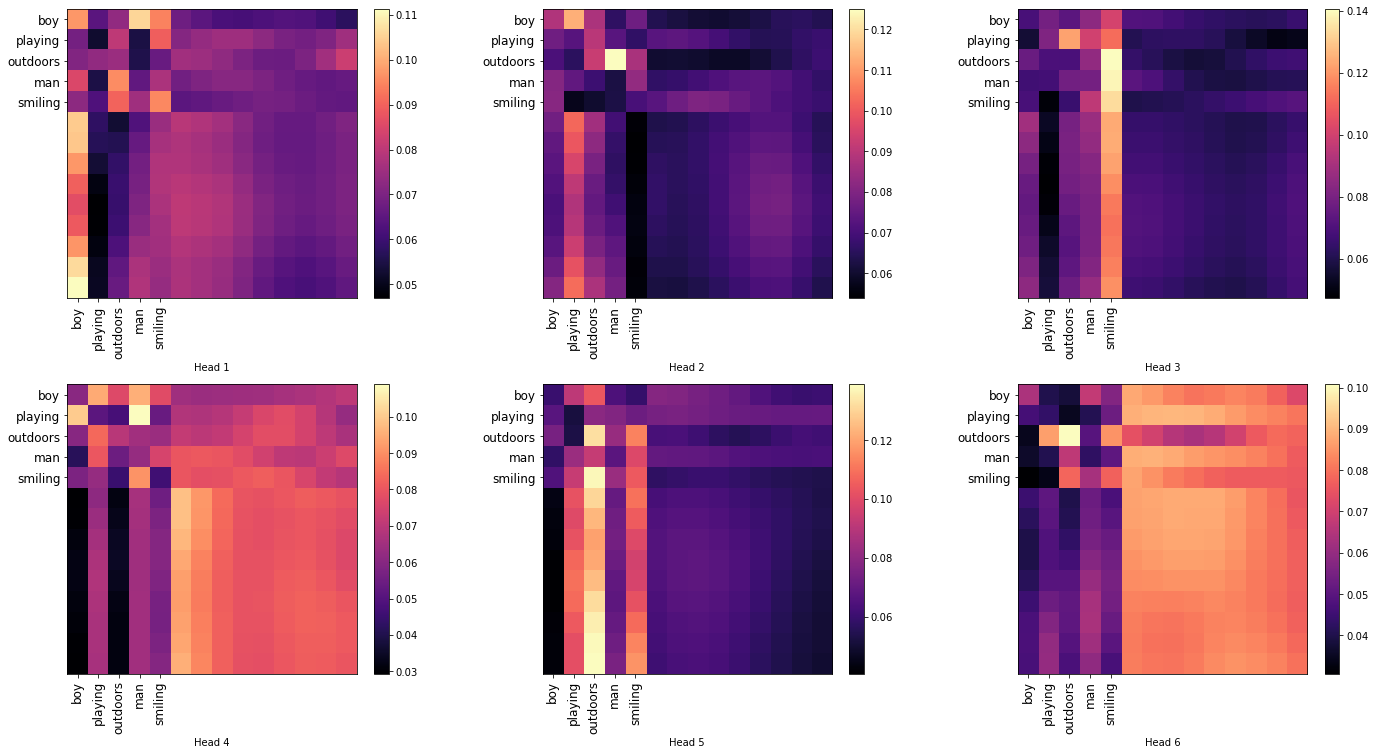

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# first sentence sequence in test dataset (Note: sentences are preprocessed, with stop-word removal)
senA_1 = ['boy', 'playing', 'outdoors', 'man', 'smiling']
senB_1 = ['group', 'kids', 'playing', 'yard', 'old', 'man', 'standing', 'background']


def visualize_scores(scores_mat, sentence, x_label_name='Head'):
    fig = plt.figure(figsize=(20, 20))

    for idx, scores in enumerate(scores_mat):
        scores_np = np.array(scores)
        ax = fig.add_subplot(4, 3, idx+1)
        # append the attention weights
        im = ax.imshow(scores, cmap='magma')

        fontdict = {'fontsize': 12}

        ax.set_xticks(range(len(sentence)))
        ax.set_yticks(range(len(sentence)))

        ax.set_xticklabels(sentence, fontdict=fontdict, rotation=90)
        ax.set_yticklabels(sentence, fontdict=fontdict)
        ax.set_xlabel('{} {}'.format(x_label_name, idx+1))

        fig.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()
    
    
# heatmaps of final encoder layer for sentence A (empty spaces are for padding)
visualize_scores(attn_scores1.squeeze().detach().numpy(), senA_1)

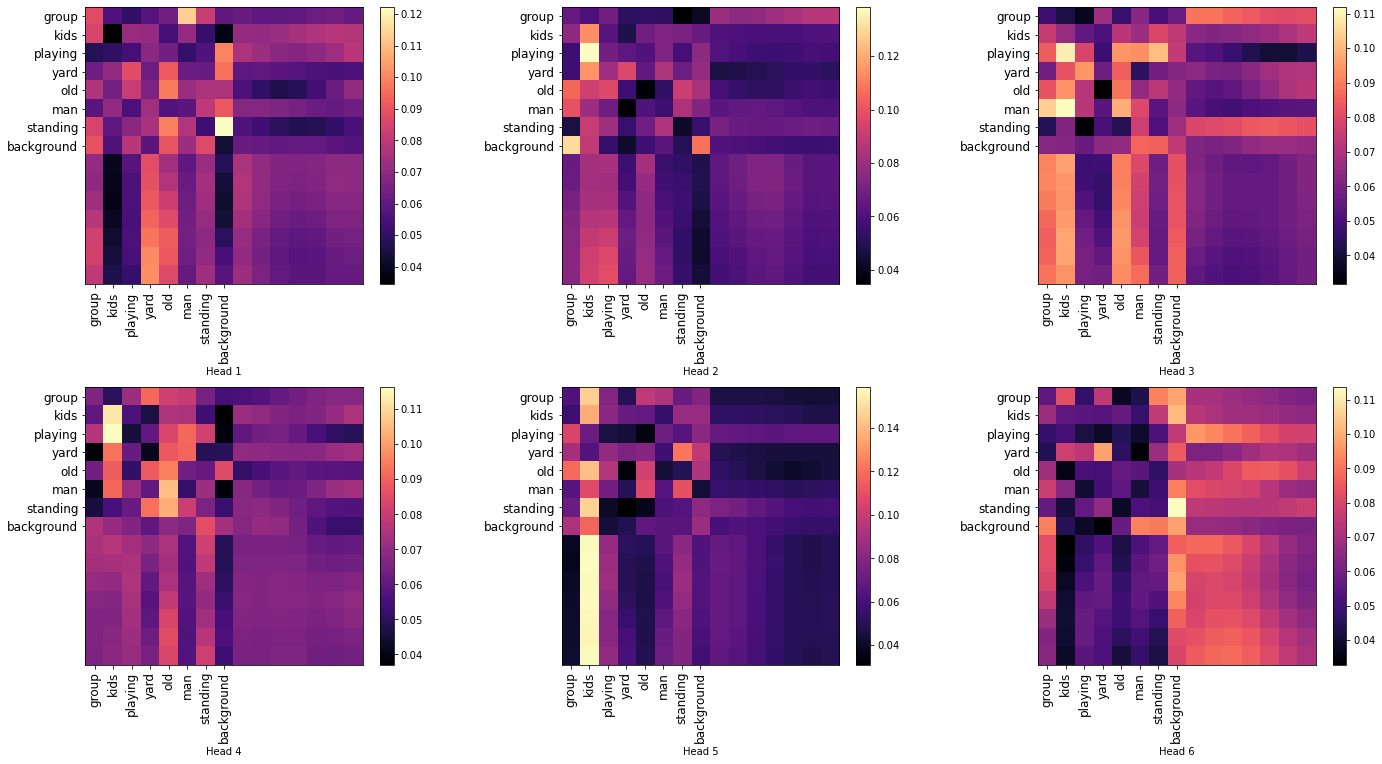

In [13]:
# heatmaps of final encoder layer for sentence B (empty spaces are for padding)
visualize_scores(attn_scores2.squeeze().detach().numpy(), senB_1)